In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
sns.set_context('poster', font_scale=1.25)

We are solving

$$\frac{df}{dt}=-(\vec{v}\cdot \nabla)f + D \nabla^2 f + sf(1-f)$$

in two dimensions.

In [5]:
from adr_2d.solver import Solver

In [6]:
import skimage as ski
import skimage.io

In [7]:
import time

In [8]:
sol = Solver(imax=500, jmax=500, kmax=100, use_morton=False)

Creating initial gaussian condition...
Done!
Creating advection operator...
Done!
Creating diffusion operator...
Done!


It takes *soooooo* long to make these operators...bleh. Let's see if we can speed it up...if we want to do it right, we really have to initialize the elements in a more intelligent manner...

In [9]:
result = sol.run()

I'm so confused. Why does this start sucking sometimes. I guess we'll figure out. Maybe it's exploding...

In [10]:
crap = np.where(result < 0)

In [11]:
ruh_roh_1 = crap[0]

Ok yeah there are problems lol.

In [12]:
ruh_rohs = np.where(result < 0)[0]

In [13]:
ruh_rohs

array([  0,   0,   0, ..., 499, 499, 499])

In [14]:
result.min()

-0.0165743615267064

Interesting. So instabilities are certainly growing...but not exploding...maybe it is an instability. Maybe I need more grid points???

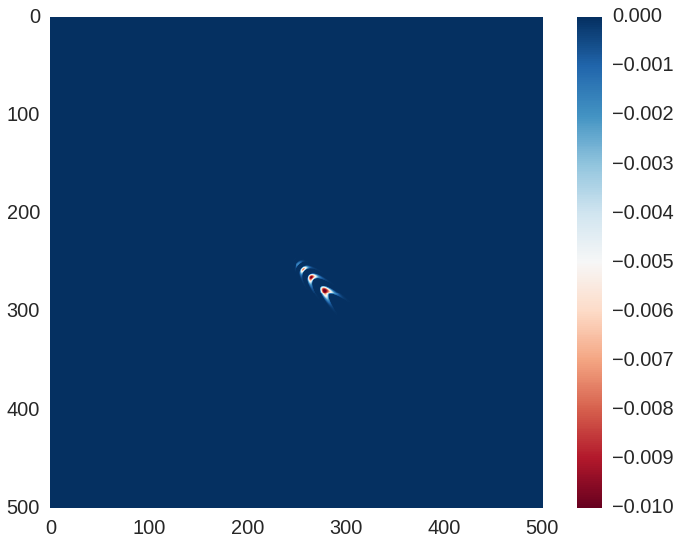

In [36]:
ski.io.imshow(result[:, :, 10])
plt.grid(False)
plt.clim([-.01, 0])

lol...IDK. Why are things going negative? It's like an echo...which is cool, but undesired...it's like a neat flip-flop.